<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
print(df.head())
check_values = df['diagnosis']


(569, 33)
         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop(['diagnosis','id','Unnamed: 32'], axis=1)
df.head()
df_pca = df

In [0]:
import seaborn as sns

#Here is a pairplot of the information , but this doesn't really give you a sense for how they might be seperated by clusters
#With more "dimensions" being taken into account the clustering might make more sense.
sns.pairplot(df.iloc[:,:10])

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# we know that we want to have two clusters, but if we didn't we would try 
# an elbow graph:

# Perform K-Means Clustering on the Dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
labels = kmeans.labels_

In [29]:
#add labels to df
df['clusters']=labels
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,clusters
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [36]:
# Your Code Here
#I need to compare check values against my kmeans clusters:

df.clusters
comparison_df = pd.concat([check_values,df.clusters],axis=1)
comparison_df.head()


,diagnosis,clusters
0,M,0
1,M,0
2,M,0
3,M,1
4,M,0


In [0]:
#Turning the Ms into 0s and the Bs into 1s
M0 = pd.Series(check_values.replace(['M',"B"],[0,1]))
#adding to my original"comparison_df"
comparison_df = pd.concat([comparison_df,M0],axis=1)

In [48]:
#Checking df:
comparison_df.head()

,diagnosis,clusters,diagnosis
0,M,0,0
1,M,0,0
2,M,0,0
3,M,1,0
4,M,0,0


In [50]:
#change the name of the last column:
comparison_df.columns = ['diagnosis','clusters','M0']
comparison_df.head()

,diagnosis,clusters,M0
0,M,0,0
1,M,0,0
2,M,0,0
3,M,1,0
4,M,0,0


In [56]:
correct = len(comparison_df[comparison_df['M0'] == comparison_df['clusters']])
total = len(df)
print(correct,total, correct/total)
#Success rate of 85%... not bad lets see how it works out with PCA

486 569 0.8541300527240774


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [68]:
##### Your Code Here #####
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Turn my initial data frame into an array
np_data = array(df_pca)

#Standardize the data:
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)

#Create pca instance
# The parameter = 2 because I only want the first two variables first
pca = PCA(2)

#Fit on data
pca.fit(norm_data)

#access value and vectors:
eigenvecs= pca.components_
eigenvals = pca.explained_variance_

#transform data:
#Right now we have the eigenvecs and vals calculated
#for the values fed in, but we haven't actually generated
#principal component variables. Here is when we create them:

pca_vals = pca.transform(norm_data)
pca_vals

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

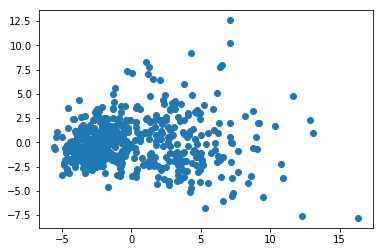

In [78]:
plt.scatter(pca_vals[:,0],pca_vals[:,1])

In [89]:
#I already have this object
kmeans_pca1 = KMeans(n_clusters= 2)
kmeans_pca1.fit(pca_vals)
labels = kmeans.labels_
labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [91]:
check_vals = array(M0)
#Here is a better way to check this method:
sum(check_vals == labels)
#huh... the exact same number of values correct as before... 
#maybe I have an error somewhere?

486

In [0]:
#Lets add more elemnts of the pca. Figure out how many with scree plot:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

(569, 30)
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812]


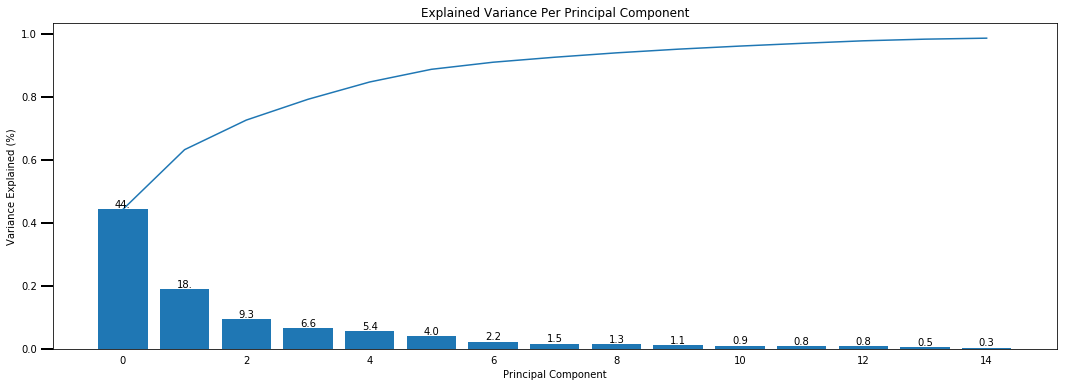

In [104]:
#Create pca instance
#More parameters this time:
pca = PCA(15)
#I can have up to PCA 30 because that is the number of columns I have 
print(norm_data.shape)

#Fit on data
pca.fit(norm_data)

vals = pca.explained_variance_ratio_
agg = np.cumsum(vals)
print(agg)
#access value and vectors:
eigenvecs= pca.components_
eigenvals = pca.explained_variance_

scree_plot(pca)
#We hit 90 on the 7nth pca component


In [111]:
pca = PCA(7)
pca.fit(norm_data)
pca7_vals = pca.transform(norm_data)
pca7_vals

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -1.19511011,
         1.41142444,  2.15936994],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.62177499,
         0.02865633,  0.01335858],
       [ 5.73389628, -1.0751738 , -0.55174759, ..., -0.17708591,
         0.54145218, -0.66816695],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  1.80999134,
        -0.53444721, -0.19275797],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.03374191,
         0.56793645,  0.22308192],
       [-5.4752433 , -0.67063679,  1.49044308, ..., -0.18470329,
         1.61783733,  1.69895202]])

In [114]:
kmeans_pca2 = KMeans(n_clusters= 2)
kmeans_pca2.fit(pca7_vals)
labels = kmeans_pca2.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [119]:
check_vals = array(M0)
#Here is a better way to check this method:
wrong =sum(check_vals == labels)
wrong

51

In [122]:
#This time it switched M and B so this is actually the number that are wrong:
correct = len(df)-wrong
total = len(df)
print('Total correct = ',correct)
print("% correct = ",correct/total)

Total correct =  518
% correct =  0.9103690685413005


## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project